In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
!ls log_files2

'fitness_&_operator_probs_geno_log.csv'    results_GSGP_log.csv
'fitness_&_operator_probs_naive_log.csv'   results_naive_log.csv
'fitness_&_operator_probs_pheno_log.csv'   results_operators_log.csv
 results_algos_log.csv			   results_pheno_log.csv
 results_geno_log.csv


In [100]:
df = pd.read_csv('log_files/results_operators_log.csv') 
df.head()

,Seed,Algorithm,time,mean_s_error,explained_variance,final_tree_size
0,1,GP_normal_fitness,0:00:14.295953,2.099398,-1.664867,NaN
1,0,GP_fitness,0:00:15.808751,1.799009,-1.213527,NaN
2,0,GP_no_operator,0:00:19.240520,1.926161,-0.506444,NaN
3,0,GP_tournament,0:00:19.595506,1.926161,-0.506444,NaN
4,0,GP_pheno_operator,0:00:19.664632,1.926161,-0.506444,NaN


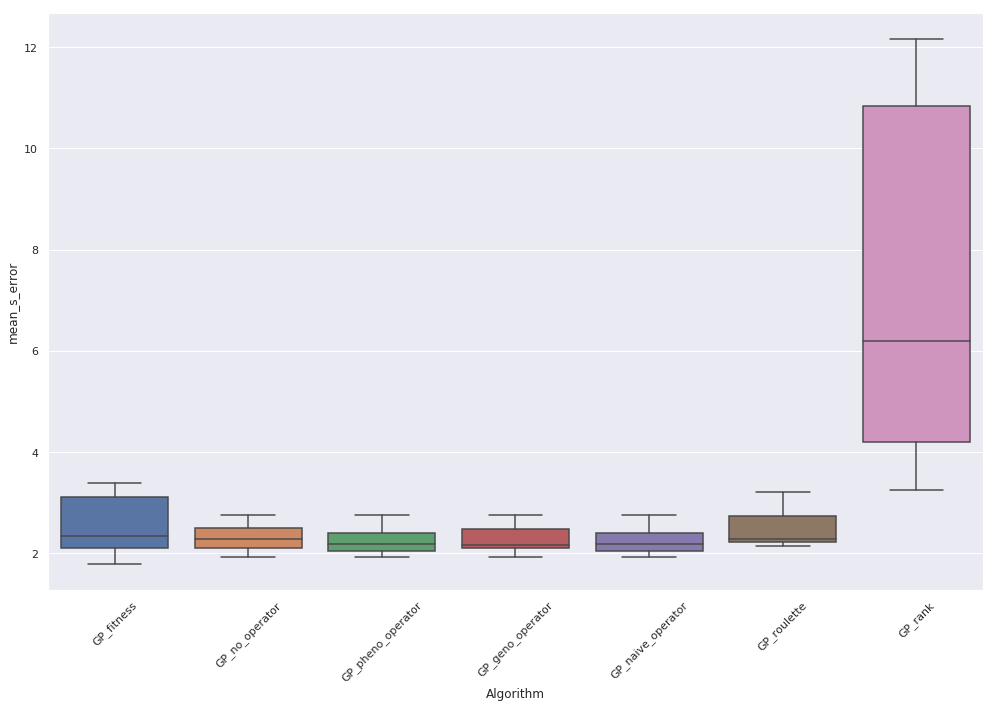

In [101]:
df2 = df2[df2.Algorithm != "GP_tournament"]
df2 = df2[df2.Algorithm != "GP_normal_fitness"]
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='mean_s_error',data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

#plt.savefig('plots/algorithms_precision_recall_boxplots.png')

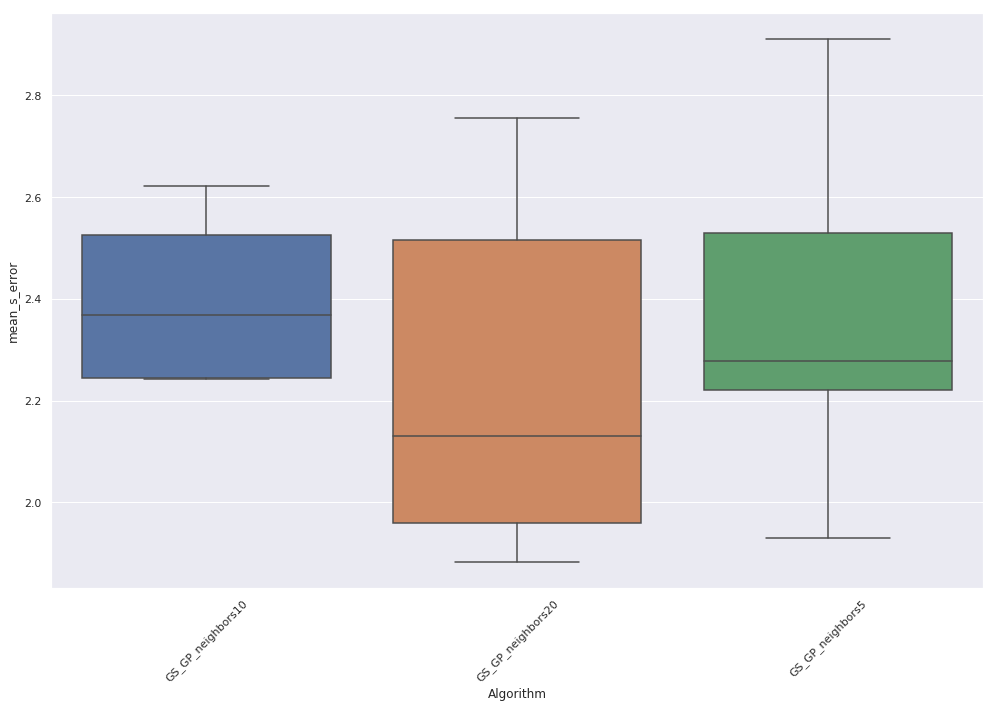

In [99]:
df_sort = df2.sort_values("Algorithm")

df_cross = df_sort.iloc[0:20]
df_edv = df_sort.iloc[21:40]
df_mut = df_sort.iloc[41:60]
df_neigh = df_sort.iloc[61:75]
df_tie = df_sort.iloc[76:]
    
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='mean_s_error',data=df_neigh
                 
                 
                 
                )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

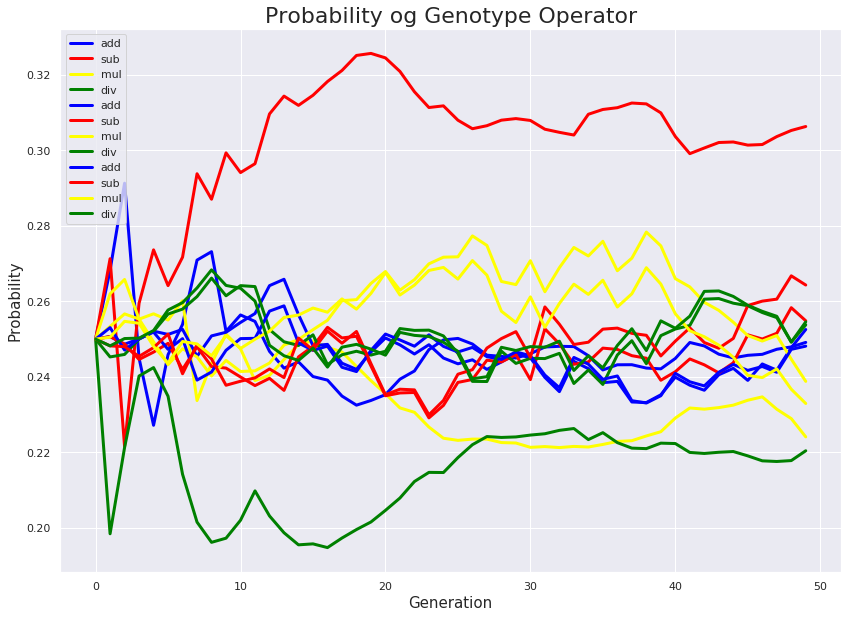

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

log_files = ['log_files/fitness_&_operator_probs_geno_log.csv',
             'log_files/fitness_&_operator_probs_pheno_log.csv',
             'log_files/fitness_&_operator_probs_naive_log.csv'
            ]

for log_file in log_files:
    
    df = pd.read_csv(log_file)

    df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div", "population_fitness","elite_fitness"].mean().reset_index()

    plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
    plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
    plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
    plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
    plt.legend()
    plt.xlabel("Generation", size=15)
    plt.ylabel("Probability", size=15)
    plt.title("Probability og Genotype Operator", size=22)

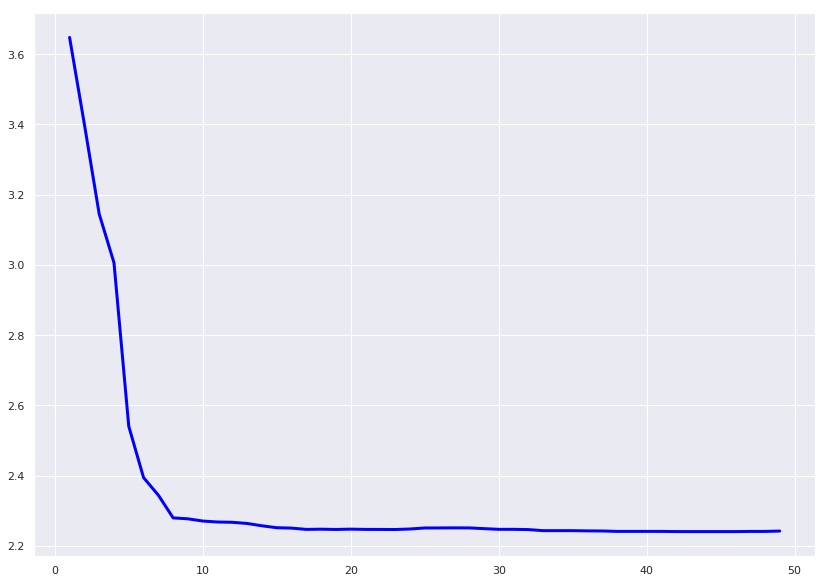

In [103]:
df1 = df_groupby.iloc[1:]

plt.plot("generation", "elite_fitness", data=df1, color="blue", linewidth=3)

Text(0.5, 1.0, 'Probability of Genotype Operator')

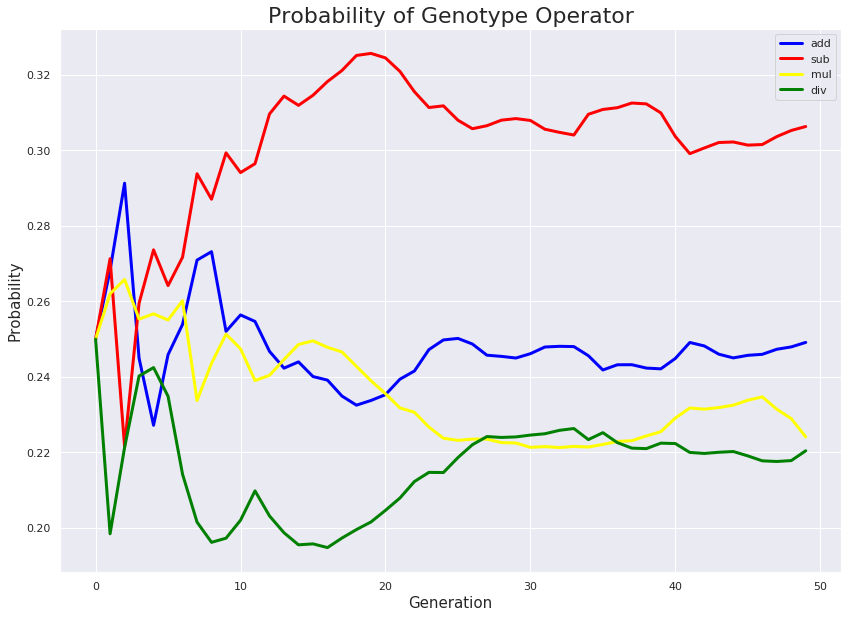

In [112]:
df = pd.read_csv('log_files2/fitness_&_operator_probs_geno_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Genotype Operator", size=22)

Text(0.5, 1.0, 'Probability of Naive Operator')

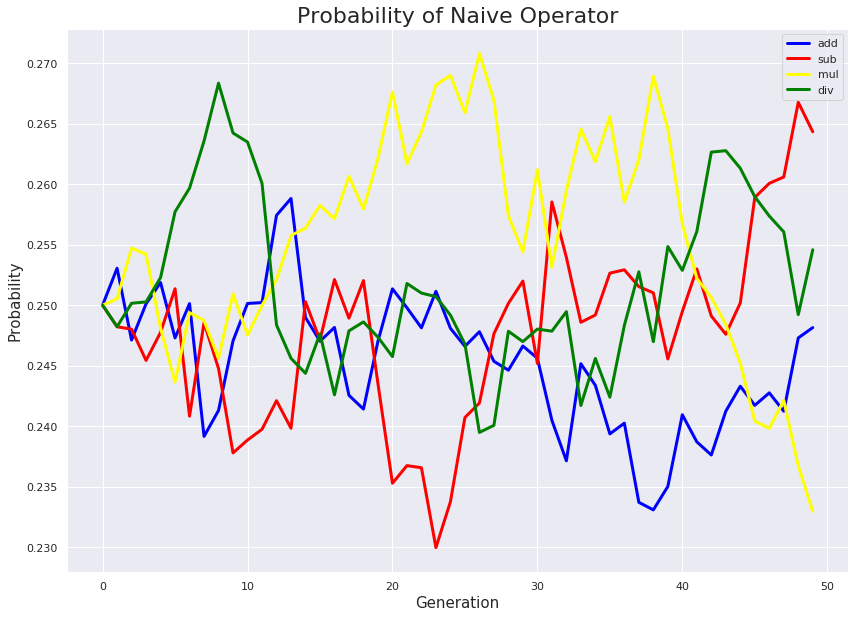

In [111]:
df = pd.read_csv('log_files2/fitness_&_operator_probs_naive_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Naive Operator", size=22)

Text(0.5, 1.0, 'Probability of Phenotype Operator')

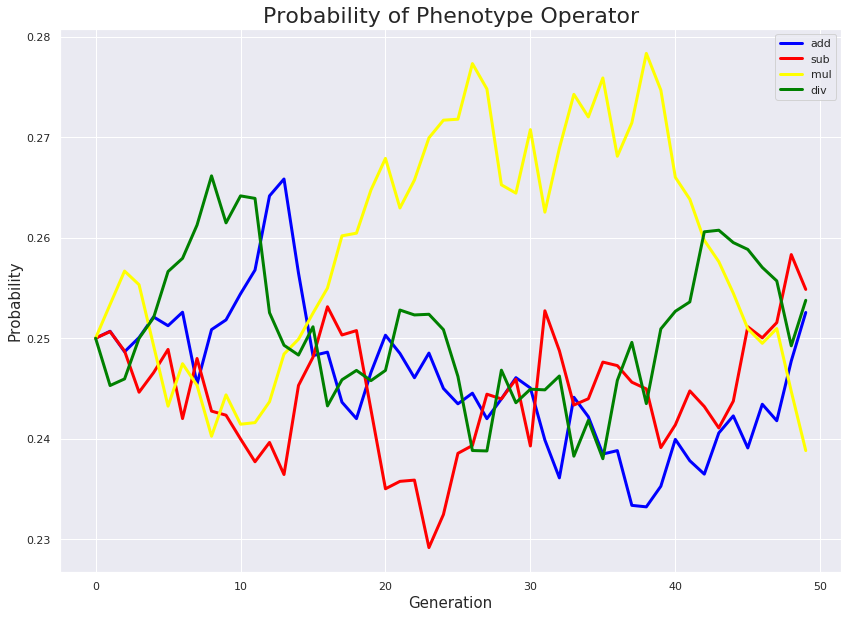

In [113]:
df = pd.read_csv('log_files2/fitness_&_operator_probs_pheno_log.csv')

df_groupby = df.groupby(["generation"])["add", "sub", "mul", "div"].mean().reset_index()

plt.plot("generation", "add", data=df_groupby, color="blue", linewidth=3)
plt.plot("generation", "sub", data=df_groupby, color="red", linewidth=3)
plt.plot("generation", "mul", data=df_groupby, color="yellow", linewidth=3)
plt.plot("generation", "div", data=df_groupby, color="green", linewidth=3)
plt.legend()
plt.xlabel("Generation", size=15)
plt.ylabel("Probability", size=15)
plt.title("Probability of Phenotype Operator", size=22)

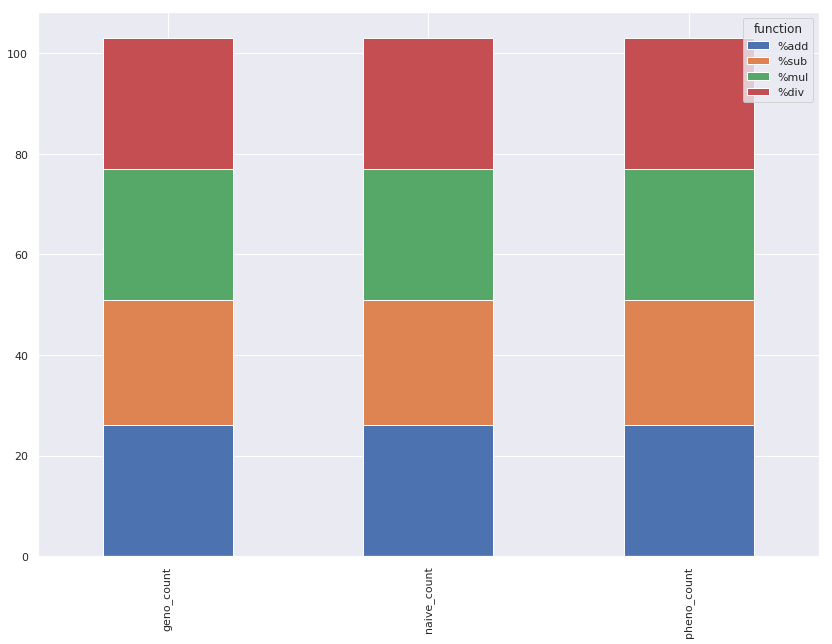

In [114]:
df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count.columns = ["function", "geno_count"]
df_count = df_count.set_index("function")

df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count2 = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count2.columns = ["function", "naive_count"]
df_count2 = df_count2.set_index("function")

df_groupby[["%add", "%sub", "%mul", "%div"]] = df_groupby[["add", "sub", "mul", "div"]].diff().fillna(0)
df_count3 = df_groupby[["%add","%sub","%mul","%div"]][df_groupby[["%add","%sub","%mul","%div"]] > 0].count().to_frame().reset_index()
df_count3.columns = ["function", "pheno_count"]
df_count3 = df_count3.set_index("function")

dfs = [df_count,df_count2,df_count3]
df_join = pd.concat(dfs, axis=1)
df_bar = df_join.T
df_bar.plot(kind="bar", stacked=True)